In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import pylab as pl
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
import itertools
import scipy.stats as scs
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.cm as cm
from IPython.display import HTML, display

In [48]:
df = pd.read_csv("YB-datadump.csv")

In [49]:
df.columns = df.columns.str.lstrip()

In [50]:
df.columns = df.columns.str.lower()

In [51]:
df.columns = df.columns.str.replace(" ", "_")

In [52]:
df.head(35)

,activity_type,user_id,rm_id,user_os,viewing_app,user_groups,shared_date,shared_time,title_of_content,share_channel,viewed,time_spent_in_seconds,last_activity_date,last_activity_time,unnamed:_14,unnamed:_15
0,VIEW,1051909,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Mutual Fund Online - I,NaN,1,5,25-Aug-2017,19:29:04,NaN,NaN
1,VIEW,1052025,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,SWIFT CODES JPY,NaN,1,120,25-Aug-2017,9:53:39,NaN,SWIFT CODES JPY
2,VIEW,1052025,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Q1FY17 Press Release_Final,NaN,1,120,25-Aug-2017,9:41:15,NaN,Q1FY17 Press Release_Final
3,SHARE,1057837,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",23-Aug-2017,20:40:49,ICICI Pru Balanced,ANDROID,0,0,23-Aug-2017,20:40:49,NaN,GIB Knowledge Series
4,SHARE,1057837,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",23-Aug-2017,20:40:49,ICICI Pru Balanced,ANDROID,0,0,23-Aug-2017,20:40:49,NaN,NaN
5,SHARE,1057837,1051973.0,NaN,NaN,"All Users ,FA - NCR 2",23-Aug-2017,20:40:49,ICICI Pru Balanced,ANDROID,0,0,23-Aug-2017,20:40:49,NaN,NaN
6,VIEW,1051973,NaN,ANDROID4,CHROME_MOBILE,NaN,NaN,NaN,ICICI Pru Balanced,NaN,1,120,23-Aug-2017,20:39:43,NaN,NaN
7,VIEW,1052025,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,GIB Knowledge Series,NaN,1,220,17-Aug-2017,20:43:48,NaN,GIB Knowledge Series
8,VIEW,1051913,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Mutual Fund Online - I,NaN,1,5,12-Aug-2017,21:22:24,NaN,NaN
9,VIEW,1051913,NaN,MAC_OS_X_IPHONE,APPLE_WEB_KIT,NaN,NaN,NaN,Reliance Arbitrage Adv,NaN,1,10,12-Aug-2017,21:07:16,NaN,NaN


# EDA & Feature Engineering

In [53]:
df.user_os.unique()


array(['MAC_OS_X_IPHONE', nan, 'ANDROID4', 'ANDROID6', 'ANDROID_MOBILE',
       'ANDROID5', 'WINDOWS_10', 'WINDOWS_7', 'iOS9_IPHONE', 'MAC_OS_X'], dtype=object)

In [54]:
df.rename(columns={'user_os': 'viewing_device'}, inplace=True)
df["viewing_device"].replace({"WINDOWS_7" : "Laptop/Desktop", "WINDOWS_10" : "Laptop/Desktop", "MAC_OS_X" : "Laptop/Desktop"}, inplace = True)
df["viewing_device"].replace({"ANDROID_MOBILE" : "Phone", "ANDROID6" : "Phone", "ANDROID4" : "Phone", "ANDROID5" : "Phone", "MAC_OS_X_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone", "iOS8_1_IPHONE" : "Phone", "iOS8_3_IPHONE" : "Phone", "iOS9_IPHONE" : "Phone"}, inplace=True)

In [55]:
df.viewing_app.unique()

array(['APPLE_WEB_KIT', nan, 'CHROME_MOBILE', 'MOBILE_SAFARI', 'CHROME'], dtype=object)

In [56]:
df.rename(columns={'viewing_app': 'browser'}, inplace=True)
df["browser"].replace({"CHROME45" : "CHROME", "CHROME51" : "CHROME", "CHROME33" : "CHROME", "CHROME30" : "CHROME", "CHROME47" : "CHROME", "CHROME49" : "CHROME", "CHROME42" : "CHROME", "CHROME48" : "CHROME", "CHROME38" : "CHROME", "FIREFOX44" : "FIREFOX", "FIREFOX47" : "FIREFOX", "FIREFOX43" : "FIREFOX", "FIREFOX37" : "FIREFOX", "EDGE12" : "EDGE"}, inplace = True)
df["browser"].replace({"EDGE13" : "EDGE", "EDGE14" : "EDGE", "IE7" : "IE", "IE10" : "IE", "IE11" : "IE", "SAFARI9" : "SAFARI", "APPLE_WEB_KIT" : "SAFARI"}, inplace=True)
df.browser.unique()

array(['SAFARI', nan, 'CHROME_MOBILE', 'MOBILE_SAFARI', 'CHROME'], dtype=object)

In [57]:
df["shared_date"] = pd.to_datetime(df["shared_date"], format="%d-%b-%Y")

In [58]:
df["last_activity_date"] = pd.to_datetime(df["last_activity_date"], format="%d-%b-%Y")

In [59]:
df['weekday'] = df['last_activity_date'].dt.dayofweek
df["weekday_name"] = df['last_activity_date'].dt.weekday_name
df["month"] = df['last_activity_date'].dt.month
df["time_of_day"] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [60]:
# 1: Night(Midnight to 6 am), 2: Morning(6 am to Noon), 3: Afternoon(Noon to 6 pm), 4: Evening(6 pm to Midnight)
df["time_of_day"].replace({0 : 1, 2 : 1, 3 : 1, 4 : 1, 5 : 1}, inplace = True)
df["time_of_day"].replace({6 : 2, 7 : 2, 8 : 2, 9 : 2, 10 : 2, 11 : 2}, inplace = True)
df["time_of_day"].replace({12 : 3, 13 : 3, 14 : 3, 15 : 3, 16 : 3, 17 : 3}, inplace = True)
df["time_of_day"].replace({18 : 4, 19 : 4, 20 : 4, 21 : 4, 22 : 4, 23 : 4,}, inplace = True)
df.time_of_day.unique()

array([4, 2, 3, 1])

In [61]:
df['hour'] = pd.to_datetime(df['last_activity_time'], format='%H:%M:%S').dt.hour

In [62]:
df.viewed.unique()

array([1, 0])

In [63]:
df["time_spent_mins"] = df["time_spent_in_seconds"]/60.

In [64]:
hour_grouped = df.groupby("time_of_day")["time_spent_mins"].sum()

In [65]:
# plot = plt.bar(xrange(0,4),(df.groupby("time_of_day")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])


In [66]:
#sns.distplot(df["time_spent_mins"], color="m")
len(df)

538

525

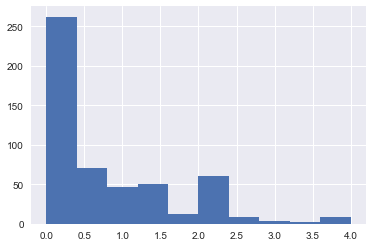

In [67]:
df = df[df["time_spent_mins"] <= 4]
plot = plt.hist(df["time_spent_mins"])
#plt.boxplot(new_df["time_spent_mins"])

len(df) 
# 1917 (22% reduced)
#sns.distplot(new_df["time_spent_mins"], color="g")

In [68]:
temp = 0
for index, row in df.iterrows():
    if row["activity_type"] == "SHARE":
        temp = row["shared_date"]
    else:
        if temp == 0:
            row["shared_date"] = row["last_activity_date"]
        else:
            row["shared_date"] = temp         

In [69]:
df['num_of_day_from_share_view'] = (df["last_activity_date"] - df["shared_date"]).astype(dt.timedelta).map(lambda x: 0 if pd.isnull(x) else x.days)


In [70]:
df = df[df['num_of_day_from_share_view']<2]

In [71]:
len(df)

520

# SHARE DATA ANALYSIS

In [72]:
share_df = df[df.activity_type == "SHARE"]
share_df.columns

Index([u'activity_type', u'user_id', u'rm_id', u'viewing_device', u'browser',
       u'user_groups', u'shared_date', u'shared_time', u'title_of_content',
       u'share_channel', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'unnamed:_14',
       u'unnamed:_15', u'weekday', u'weekday_name', u'month', u'time_of_day',
       u'hour', u'time_spent_mins', u'num_of_day_from_share_view'],
      dtype='object')

In [73]:
y_time_spent = share_df.groupby("weekday")["time_spent_mins"].sum()

<Container object of 3 artists>

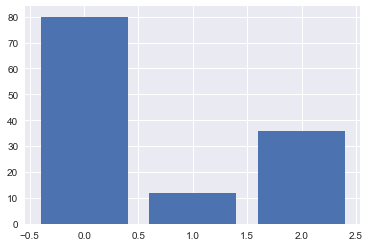

In [74]:
plt.bar(xrange(0,len(share_df.groupby("month")["rm_id"].count())), share_df.groupby("month")["rm_id"].count())

In [75]:
#sns.stripplot(x=share_df["weekday_name"], y=share_df["time_spent_mins"], data=share_df, jitter=True)

In [76]:
len(share_df.rm_id.unique()), len(share_df)/float(len(share_df.rm_id.unique()))

(29, 4.413793103448276)

In [77]:
len(share_df), len(share_df.user_id.unique())

(128, 94)

(array([ 21.,   5.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  1. ,   4.4,   7.8,  11.2,  14.6,  18. ,  21.4,  24.8,  28.2,
         31.6,  35. ]),
 <a list of 10 Patch objects>)

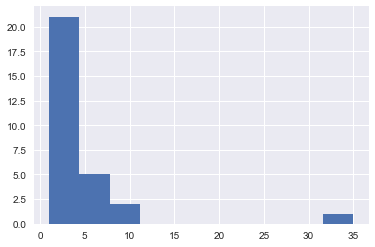

In [78]:
from collections import Counter
user_id_list_sh = [j.rm_id for i,j in df.iterrows() if j["activity_type"] == "SHARE"]
num_shares_dict = Counter(user_id_list_sh)
num_shares_dict, len(num_shares_dict)
num_shares = [v for k,v in num_shares_dict.iteritems()]
# len(num_shares),
plt.hist(num_shares)

In [79]:
# sns.distplot(share_df["num_of_day_from_share_view"], color="m")

(array([ 125.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    3.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

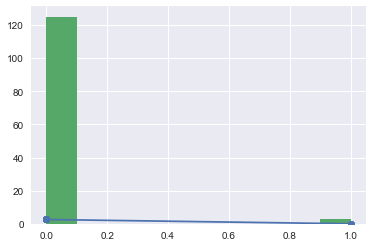

In [80]:
import pylab as pl
h = sorted(share_df["num_of_day_from_share_view"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h)

In [81]:
share_df.describe()

,user_id,rm_id,viewed,time_spent_in_seconds,unnamed:_14,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,1.280000e+02,1.280000e+02,128.000000,128.000000,0.0,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000
mean,1.054380e+06,1.002425e+06,0.546875,32.187500,NaN,2.968750,6.65625,2.898438,13.875000,0.536458,0.023438
std,1.856837e+03,2.228917e+05,0.499754,45.807497,NaN,1.345377,0.89123,0.637908,3.634914,0.763458,0.151883
min,1.050918e+06,1.286000e+03,0.000000,0.000000,NaN,0.000000,6.00000,1.000000,0.000000,0.000000,0.000000
25%,1.052969e+06,1.050918e+06,0.000000,0.000000,NaN,2.000000,6.00000,3.000000,12.000000,0.000000,0.000000
50%,1.053642e+06,1.051915e+06,1.000000,7.500000,NaN,4.000000,6.00000,3.000000,14.000000,0.125000,0.000000
75%,1.055088e+06,1.051973e+06,1.000000,55.000000,NaN,4.000000,8.00000,3.000000,16.000000,0.916667,0.000000
max,1.057837e+06,1.052349e+06,1.000000,210.000000,NaN,6.000000,8.00000,4.000000,23.000000,3.500000,1.000000


<module 'pylab' from '/Users/urmimukherjee/anaconda2/lib/python2.7/site-packages/pylab.pyc'>

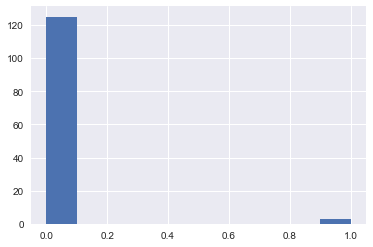

In [82]:
import pylab as pl
days_share_view = share_df[share_df["num_of_day_from_share_view"]<=7]
len(share_df),len(days_share_view)
h = sorted(days_share_view["num_of_day_from_share_view"]) #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

pl.hist(h)
pl

In [83]:
len(share_df),len(days_share_view)

(128, 128)

In [84]:
# uniq_titles = np.sort(share_df.title_of_content.unique())
# uniq_title_num_share = share_df.groupby("title_of_content")["activity_type"].count()
# #uniq_titles 
# uniq_title_num_share

In [85]:
# import pylab as pl
# h = sorted(share_df["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')

# pl.hist(h,normed=True)


In [86]:
#share_df["weekday"].plot.kde()

In [87]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("weekday")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
# share_weekday = share_df.groupby("weekday")["time_spent_mins"].sum()

In [88]:
# plot = plt.bar(xrange(0,7),(share_df.groupby("month")["time_spent_mins"].sum()))
# plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [89]:
# import pylab as pl
# new_share = share_df[share_df["time_spent_mins"]<=8]
# h = sorted(new_share["time_spent_mins"])  #sorted

# fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

# pl.plot(h,fit,'-o')
# pl.axvline(x=np.mean(h)+np.std(h),color='r', linestyle='--')
# pl.axvline(x=np.mean(h)-np.std(h),color='r', linestyle='--')
# pl.hist(h,normed=True)


In [90]:
#h = plt.hist(share_df.time_spent_mins)

In [91]:
#sns.stripplot(x="share_channel", y="time_spent_mins", data=share_df)
df.share_channel.unique()
share_df.share_channel.unique()

array(['ANDROID', 'IOS', 'WEB'], dtype=object)

([<matplotlib.axis.XTick at 0x118950250>,
 <a list of 2 Text xticklabel objects>)

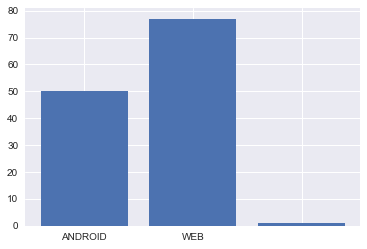

In [94]:
plt.bar(xrange(0,len(share_df.groupby("share_channel")["time_spent_mins"].count())),(share_df.groupby("share_channel")["time_spent_mins"].count()))
plt.xticks(xrange(0,3),["ANDROID","WEB"])
# plt.xlabel("Share Channel")
# plt.ylabel("Number of Shares")
# plt.title("TW - Num Shares Vs Share Channel")

In [95]:
#sns.stripplot(x="time_of_day", y="time_spent_mins", data=share_df)


# VIEW DATA ANALYSIS

In [96]:
view_df = df[(df.activity_type == "VIEW")]
view_df = view_df.drop(["share_channel", "user_groups", "shared_date", "shared_time", "rm_id"], axis =1)
view_df.describe()

,user_id,viewed,time_spent_in_seconds,unnamed:_14,weekday,month,time_of_day,hour,time_spent_mins,num_of_day_from_share_view
count,3.920000e+02,392.0,392.000000,0.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.0
mean,1.025904e+06,1.0,50.841837,NaN,3.318878,6.645408,2.915816,14.275510,0.847364,0.0
std,1.659983e+05,0.0,52.084974,NaN,1.384182,0.830542,0.822046,4.985976,0.868083,0.0
min,1.286000e+03,1.0,0.000000,NaN,0.000000,6.000000,1.000000,0.000000,0.000000,0.0
25%,1.051949e+06,1.0,10.000000,NaN,2.000000,6.000000,2.000000,11.000000,0.166667,0.0
50%,1.052001e+06,1.0,25.000000,NaN,4.000000,6.000000,3.000000,14.000000,0.416667,0.0
75%,1.052839e+06,1.0,85.000000,NaN,4.000000,7.000000,3.250000,17.250000,1.416667,0.0
max,1.057769e+06,1.0,240.000000,NaN,6.000000,8.000000,4.000000,23.000000,4.000000,0.0


In [97]:
len(view_df), len(view_df.user_id.unique())

(392, 89)

In [98]:
view_df.columns

Index([u'activity_type', u'user_id', u'viewing_device', u'browser',
       u'title_of_content', u'viewed', u'time_spent_in_seconds',
       u'last_activity_date', u'last_activity_time', u'unnamed:_14',
       u'unnamed:_15', u'weekday', u'weekday_name', u'month', u'time_of_day',
       u'hour', u'time_spent_mins', u'num_of_day_from_share_view'],
      dtype='object')

In [99]:
len(view_df.title_of_content.unique())


64

(array([ 179.,   60.,   38.,   30.,   10.,   58.,    6.,    3.,    0.,    8.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

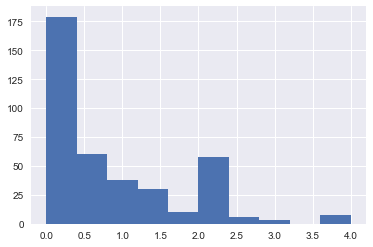

In [100]:
plt.hist(view_df["time_spent_mins"])

In [101]:
views_per_share = len(view_df)/float(len(share_df))
views_per_share

3.0625

In [ ]:
plt.hist(view_df["num_of_day_from_share_view"])

# NEW ANALYSIS -- Start

In [ ]:
from collections import Counter
user_id_list = [j.user_id for i,j in df.iterrows() if j["activity_type"] == "VIEW"]
num_views = Counter(user_id_list)
best, views = {}, []
#best = sorted(num_views, key=lambda x : num_views[x])
for k,v in num_views.iteritems():
    if v<=20:
        best[k] = v
        views.append(v)


In [ ]:
len(num_views), len(best), 

In [ ]:
plt.hist([num_views[i] for i,j in num_views.iteritems() if num_views[i]>0])

In [ ]:
best

In [ ]:
plt.hist(views)

In [ ]:
conv_ids = []
for k,v in num_views.iteritems(): 
    if v>14 and v<20:
        conv_ids.append(k)
conv_ids, len(conv_ids)

In [ ]:
view_df["conv_id"] = view_df["viewed"]
test_df = view_df
conv_df = pd.DataFrame()
for i in xrange(len(conv_ids)):
    temp_df = view_df[view_df["user_id"] == conv_ids[i]]
    conv_df = conv_df.append(temp_df)
    test_df.drop(test_df["user_id"] == conv_ids[i])
    

In [ ]:
conv_df.describe()

In [ ]:
test_df["conv_id"].replace({1:0}, inplace= True)
for k,v in num_views.iteritems():
    test_df.loc[test_df['user_id'] == k, 'num_of_views'] = v
    test_df.loc[test_df['user_id'] == k, 'total_time_mins'] = test_df[test_df["user_id"] == k]["time_spent_mins"].sum()

test_df.weekday_name.replace({0:"Sunday", 1:"Monday"}, inplace= True)
test_df.head()

In [ ]:
test_df = view_df.append(conv_df)
test_df["weekday_name"].unique()

In [ ]:
test_df

In [ ]:
dummies = pd.get_dummies(test_df, columns=["viewing_device", "weekday_name", "time_of_day", "browser"])

In [ ]:
test_df = pd.concat([test_df, dummies])
test_df = test_df.drop(["viewing_device", "weekday_name", "time_of_day", "browser"], axis=1)
test_df.describe()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
test_df.head()

In [ ]:
test_df.fillna(0, inplace= True)
len(test_df)
x = test_df.as_matrix(columns= [u'time_of_day_1', u'time_of_day_2', u'time_of_day_3', u'time_of_day_4',u'viewing_device_Laptop/Desktop',
       u'viewing_device_Phone', u'viewing_device_Tablet',
        u'weekday_name_Friday', u'weekday_name_Monday',
       u'weekday_name_Saturday', u'weekday_name_Sunday',
       u'weekday_name_Thursday', u'weekday_name_Tuesday',
       u'weekday_name_Wednesday', 'num_of_views', u'browser_CHROME', u'browser_CHROME_MOBILE',
       u'browser_EDGE', u'browser_FIREFOX',
       u'browser_IE', u'browser_MOBILE_SAFARI',
       u'browser_SAFARI'])
y = test_df.as_matrix(columns= ["time_spent_mins"])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train[1]

In [ ]:
Model = LinearRegression()
Model.fit(x_train, y_train)
Model.predict(x_test)
Model.score(x_test,y_test), Model.coef_

In [ ]:
conv_df.title_of_content.unique()

In [ ]:
len(conv_df)

In [ ]:
plt.bar(xrange(0,len(conv_df.groupby("browser")["time_spent_mins"].count())), conv_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,7), conv_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
plt.bar(xrange(0,4), conv_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Morning", "Afternoon", "Evening", "Night"])

In [ ]:
plt.bar(xrange(0,len(conv_df.groupby("viewing_device")["time_spent_mins"].count())), conv_df.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone"])

In [ ]:
plt.bar(xrange(0,len(conv_df.groupby("month")["time_spent_mins"].count())), conv_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
#### import pylab as pl
new_view = view_df[view_df["time_spent_mins"] <= 6]
len(new_view) #(20 mins, 1874/2085, 10% reduced) (12 mins, 1746/2085, 16% reduced)(6 mins, 1607/2085, 23% reduced)
# (4 mins, 1513/2085, 28% reduced)

h = sorted(new_view["time_spent_mins"])  #sorted

fit = norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed

pl.plot(h,fit,'-o')

pl.hist(h, normed= True)

pl.axvline(x = np.mean(h), linestyle='--')
pl.axvline(x = np.mean(h) + np.std(h), linestyle='--')
pl.axvline(x = np.mean(h) + 2*np.std(h), linestyle='--')


In [ ]:
new_view.describe()

In [ ]:
plt.hist(new_view["time_spent_mins"])

In [ ]:
sorted(view_df.browser.unique())

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), view_df.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])
# plt.xlabel("Viewing Application")
# plt.ylabel("Total View Time in Minutes")
# plt.title("Time Spent Vs View App")

In [ ]:
plt.bar(xrange(0,len(view_df.groupby("browser")["time_spent_mins"].sum())), new_view.groupby("browser")["time_spent_mins"].sum())
plt.xticks(xrange(0,9),['CHR',"M-CH",'EDGE', "FF", 'M-FF', 'IE', 'M-SAF', "OP",'SAF'])

In [ ]:
plt.bar(xrange(0,4), view_df.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])
# plt.xlabel("Time of Day")
# plt.ylabel("Total View Time in Minutes")
# plt.title("TW - Time Spent Vs Time of Day")

In [ ]:
plt.bar(xrange(0,4), new_view.groupby("time_of_day")["time_spent_mins"].sum())
plt.xticks(xrange(0,4),["Night", "Morning", "Afternoon", "Evening"])

In [ ]:
def get_view_time_per_user(unique_users, view_df):
    for user in unique_users:
        temp_time = view_df["user_id"]

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])
#plt.xlabel("Day of Week")
#plt.ylabel("Total View Time in Minutes")
#plt.title("TW - Time Spent Vs Day of Week")

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("weekday")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"])

In [ ]:
# Get the time spent on different apps
# def get_time_spent(view_df):
#     time_spent_secs = view_df["time_spent_in_seconds"].sum()
#     view_apps = view_df["view_app_group"].unique()

#     time_spent_dict = {}
#     for v in view_apps:
#         temp_time = view_df[view_df.view_app_group == v]["time_spent_in_seconds"].sum()
#         time_spent_dict[v] = [temp_time, float(temp_time)*100/time_spent_secs]
#     return time_spent_dict

# get_time_spent(view_df)

In [ ]:
plt.bar(xrange(0,3), view_df.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].sum())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
plt.bar(xrange(0,3), new_view.groupby("viewing_device")["time_spent_mins"].count())
plt.xticks(xrange(0,3),["Laptop/Desktop", "Phone", "Tablet"])

In [ ]:
#sns.stripplot(x="view_app_group", y="time_spent_mins", data=view_df)
#plt.bar(xrange(0,8), view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.boxplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.barplot(x="view_app_group", y="time_spent_mins", data=view_df, hue = "view_app_group")


In [ ]:
#sns.countplot(x="view_app_group", data=view_df, hue = "view_app_group")


In [ ]:
#plt.bar(xrange(0,9),view_df.groupby("view_app_group")["time_spent_mins"].sum())

In [ ]:
#sns.stripplot(x=view_df["view_app_group"], y=view_df["time_spent_mins"], data=view_df, jitter=True)


In [ ]:
#sns.stripplot(x=view_df["weekday"], y=view_df["time_spent_mins"], data=view_df, jitter=True)



In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), new_view.groupby("month")["time_spent_mins"].sum())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
plt.bar(xrange(0,7), view_df.groupby("month")["time_spent_mins"].count())
plt.xticks(xrange(0,7),["Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug"])

In [ ]:
# clusterer = KMeans(n_clusters=7, random_state=10)
# clusterer.fit(X)

